<a href="https://colab.research.google.com/github/karlacuv/MCD_Procesamiento/blob/main/Miniproyecto2_EmotionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Conexión a Drive y Unzip de Imágenes

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip '/content/drive/My Drive/Files/MCD/Procesamiento y Clasificación de Datos/Base Miniproyecto 2/archive.zip'

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

### Imports

In [11]:
import os

import tensorflow as tf
from tensorflow import keras
import argparse
from imutils import paths
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use("Agg")

# Importar los paquetes de keras y tensorflow
from tensorflow.keras import backend as K
from tensorflow.keras import utils as np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, ZeroPadding2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import  ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from keras import regularizers
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### Carga de Imágenes from_directory

In [4]:
#Importando Imágenes con from_directory - mejores resultados para modelo

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                    zoom_range=0.3, 
                                    horizontal_flip=True)
train_set=train_datagen.flow_from_directory('train',
                                            batch_size=64,
                                            target_size=(48,48),
                                            shuffle=True,
                                            color_mode="grayscale",class_mode='categorical')



test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory('test',
                                            batch_size=64,
                                            target_size=(48,48),
                                            shuffle=True,
                                            color_mode="grayscale",class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [7]:
train_set.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

### Carga de Imágenes 1 x 1 y Label Encoder

In [5]:
#Importando Imágenes 1 x 1 para Matriz de Confusión y Reporte de Clasificación - sklearn metrics tiene problemas con from_directory

import glob
import tensorflow as tf
import numpy as np

angry = glob.glob('train/angry/*.*')
disgust = glob.glob('train/disgust/*.*')
fear = glob.glob('train/fear/*.*')
happy = glob.glob('train/happy/*.*')
neutral = glob.glob('train/neutral/*.*')
sad = glob.glob('train/sad/*.*')
surprise = glob.glob('train/surprise/*.*')
data = []
labels = []
for i in angry:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='grayscale')
    image=np.array(image)
    data.append(image)
    labels.append('Angry')
for i in disgust:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='grayscale')
    image=np.array(image)
    data.append(image)
    labels.append('Disgust')
for i in fear:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='grayscale')
    image=np.array(image)
    data.append(image)
    labels.append('Fear')
for i in happy:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='grayscale')
    image=np.array(image)
    data.append(image)
    labels.append('Happy')
for i in neutral:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='grayscale')
    image=np.array(image)
    data.append(image)
    labels.append('Neutral')
for i in sad:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='grayscale')
    image=np.array(image)
    data.append(image)
    labels.append('Sad')
for i in surprise:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='grayscale')
    image=np.array(image)
    data.append(image)
    labels.append('Surprise')
train_data = np.array(data)
train_labels = np.array(labels)
train_data.shape

(28709, 48, 48)

In [6]:
# For test set

angry = glob.glob('test/angry/*.*')
disgust = glob.glob('test/disgust/*.*')
fear = glob.glob('test/fear/*.*')
happy = glob.glob('test/happy/*.*')
neutral = glob.glob('test/neutral/*.*')
sad = glob.glob('test/sad/*.*')
surprise = glob.glob('test/surprise/*.*')
data = []
labels = []
for i in angry:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='grayscale')
    image=np.array(image)
    data.append(image)
    labels.append('Angry')
for i in disgust:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='grayscale')
    image=np.array(image)
    data.append(image)
    labels.append('Disgust')
for i in fear:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='grayscale')
    image=np.array(image)
    data.append(image)
    labels.append('Fear')
for i in happy:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='grayscale')
    image=np.array(image)
    data.append(image)
    labels.append('Happy')
for i in neutral:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='grayscale')
    image=np.array(image)
    data.append(image)
    labels.append('Neutral')
for i in sad:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='grayscale')
    image=np.array(image)
    data.append(image)
    labels.append('Sad')
for i in surprise:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='grayscale')
    image=np.array(image)
    data.append(image)
    labels.append('Surprise')
test_data = np.array(data)
test_labels = np.array(labels)
test_data.shape

(7178, 48, 48)

In [8]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

X_train = train_data.astype('float32')
X_test = test_data.astype('float32')
X_train /= 255
X_test /= 255

lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(train_labels))
y_test = np_utils.to_categorical(lb.fit_transform(test_labels))

### Modelo

In [12]:
def get_model(input_size, classes=7):
     #Initialising the CNN
    model = Sequential()   

    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape = input_size))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(classes, activation='softmax'))

    #Compliling the model
    model.compile(optimizer=Adam(lr=0.0001, decay=1e-6), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

In [13]:
emotion_model = get_model((48,48,1), 7)
emotion_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 128)      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 989 kB 5.1 MB/s 


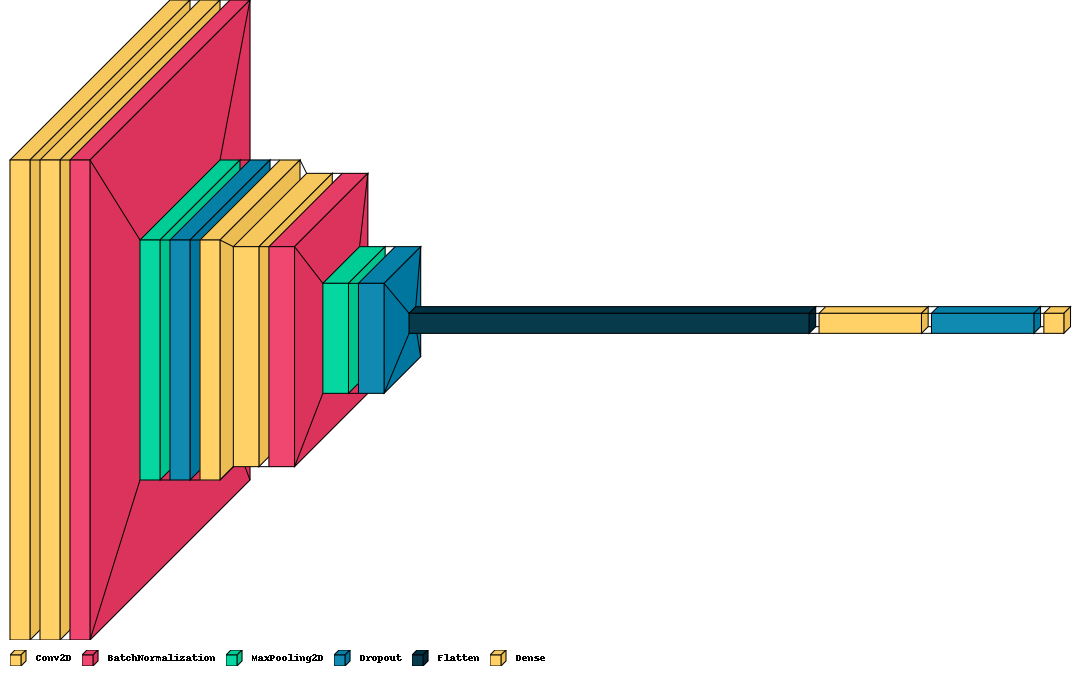

In [14]:
# Visualización de Modelo
!pip install visualkeras
import visualkeras
visualkeras.layered_view(emotion_model, scale_xy=10, legend=True)

### Entrenamiento del Modelo

In [ ]:
steps_per_epoch = train_set.n // train_set.batch_size
validation_steps = test_set.n // test_set.batch_size

history = emotion_model.fit(x=train_set,
                 validation_data=test_set,
                 epochs=60,
                 steps_per_epoch=steps_per_epoch,
                 validation_steps=validation_steps)

Epoch 1/60
448/448 [==============================] - 808s 2s/step - loss: 4.2703 - accuracy: 0.2862 - val_loss: 6.2387 - val_accuracy: 0.2892
Epoch 2/60
448/448 [==============================] - 839s 2s/step - loss: 3.4833 - accuracy: 0.3398 - val_loss: 3.1334 - val_accuracy: 0.3913
Epoch 3/60
448/448 [==============================] - 804s 2s/step - loss: 2.9632 - accuracy: 0.3709 - val_loss: 2.6430 - val_accuracy: 0.4270
Epoch 4/60
448/448 [==============================] - 955s 2s/step - loss: 2.5520 - accuracy: 0.4014 - val_loss: 2.2679 - val_accuracy: 0.4625
Epoch 5/60
448/448 [==============================] - 926s 2s/step - loss: 2.2323 - accuracy: 0.4270 - val_loss: 2.0130 - val_accuracy: 0.4713
Epoch 6/60
448/448 [==============================] - 821s 2s/step - loss: 1.9941 - accuracy: 0.4471 - val_loss: 1.8566 - val_accuracy: 0.4727
Epoch 7/60
448/448 [==============================] - 850s 2s/step - loss: 1.8147 - accuracy: 0.4669 - val_loss: 1.6253 - val_accuracy: 0.5187

Epoch 58/60
448/448 [==============================] - 790s 2s/step - loss: 0.5486 - accuracy: 0.8323 - val_loss: 1.2122 - val_accuracy: 0.6582
Epoch 59/60
448/448 [==============================] - 791s 2s/step - loss: 0.5413 - accuracy: 0.8324 - val_loss: 1.2536 - val_accuracy: 0.6611
Epoch 60/60
448/448 [==============================] - 792s 2s/step - loss: 0.5394 - accuracy: 0.8369 - val_loss: 1.2925 - val_accuracy: 0.6565


In [ ]:
emotion_model.save('Model_Correcto.h5')  

In [15]:
emotion_model = tf.keras.models.load_model('/content/drive/My Drive/Files/MCD/Procesamiento y Clasificación de Datos/Semana 6 - Redes Convolucionales/Model_Correcto.h5')

## Loss y Accuracy

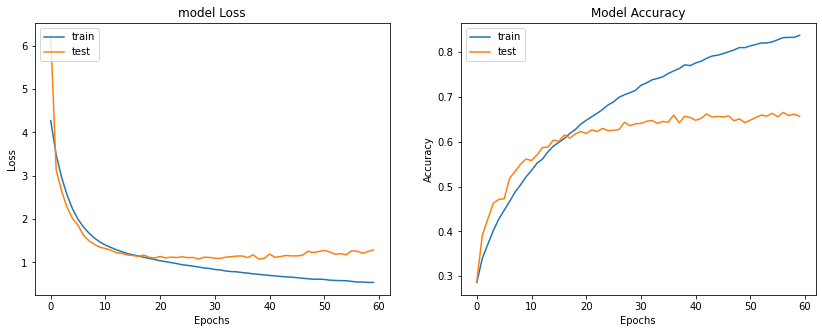

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Evaluación del modelo

In [ ]:
train_loss, train_accu = emotion_model.evaluate(train_set)
test_loss, test_accu = emotion_model.evaluate(test_set)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_accu*100, test_accu*100)) 

113/113 [==============================] - 53s 463ms/step - loss: 1.2918 - accuracy: 0.6567
final train accuracy = 91.09 , validation accuracy = 65.67


In [ ]:
emotion_model.save_weights('emotion_model_bestweight.h5')

## Matriz de Confusión y Reporte de Clasificación en Set de Prueba

Confusion Matrix
[[ 529    6   81   57  142  111   32]
 [  26   63    6    4    3    8    1]
 [  99    0  489   49  125  164   98]
 [  30    0   30 1499  131   40   44]
 [  56    3   67   82  867  129   29]
 [ 113    1  125   75  306  590   37]
 [  13    1   59   34   34   13  677]]
Classification Report
              precision    recall  f1-score   support

       angry       0.61      0.55      0.58       958
     disgust       0.85      0.57      0.68       111
        fear       0.57      0.48      0.52      1024
       happy       0.83      0.84      0.84      1774
     neutral       0.54      0.70      0.61      1233
         sad       0.56      0.47      0.51      1247
    surprise       0.74      0.81      0.77       831

    accuracy                           0.66      7178
   macro avg       0.67      0.63      0.65      7178
weighted avg       0.66      0.66      0.65      7178



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

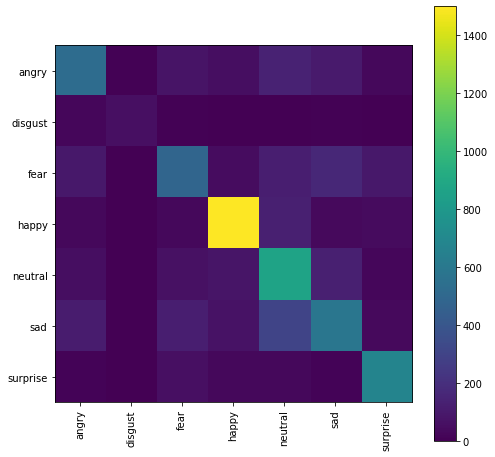

In [25]:
y_pred = emotion_model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
class_labels = test_set.class_indices
class_labels = {v:k for k,v in class_labels.items()}

from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

cm_test = confusion_matrix(test_set.classes, y_pred)
print('Confusion Matrix')
print(cm_test)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(test_set.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
plt.imshow(cm_test, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)
plt